### DIGIT RECOGNIZER USING A CONV NET IN KERAS

In [7]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [27]:
#Import Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization,Flatten
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

In [16]:
#read the file
train = pd.read_csv('../Digit_recognizer/data/train.csv')
test = pd.read_csv('../Digit_recognizer/data/test.csv')
Y_orig = np.array(train['label'][:])
X_orig = np.array(train.drop(['label'],axis=1)[:])
X_test = np.array(test[:]).reshape(-1,28,28,1)
X_test.shape

(28000, 28, 28, 1)

Shape of X_train: (42000, 28, 28, 1)
Label of the trained image: 1


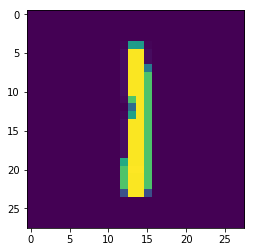

In [17]:
X_orig_reshape = X_orig.reshape(-1,28,28,1)
print('Shape of X_train:',X_orig_reshape.shape)
index = 2
plt.imshow(X_orig_reshape[index,:,:,0])
print('Label of the trained image:',Y_orig[index])
#plt.imshow(X_test[index,:,:,0])

In [19]:
uniq_labels = len(np.unique(Y_orig))
Y_orig_reshape = np.eye(uniq_labels)[Y_orig.reshape(-1)]

In [20]:
X_train,X_val,Y_train,Y_val = train_test_split(X_orig_reshape,Y_orig_reshape,test_size = 0.1)

In [21]:
print('Shape of X_train: ',X_train.shape)
print('Shape of Y_train: ',Y_train.shape)
print('Shape of X_val: ',X_val.shape)
print('Shape of Y_val: ',Y_val.shape)

Shape of X_train:  (37800, 28, 28, 1)
Shape of Y_train:  (37800, 10)
Shape of X_val:  (4200, 28, 28, 1)
Shape of Y_val:  (4200, 10)


In [49]:
model = Sequential()

#Make a Input -> [CONV2D(16,3x3)] -> Maxpool -> [CONV2D(32,3x3)]^2 -> flatten -> Dense layer --> Dense layer
#L1 - Results in 25*25*16 and then pools to 15
model.add(Conv2D(activation='relu',kernel_size=(3,3),filters=16,input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))

#L2
model.add(Conv2D(activation='relu',kernel_size=(3,3),filters=32))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
#L3
model.add(Flatten())
#L4 - Dense
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
#L5 - Dense
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
#L6 - Dense output layer
model.add(Dense(10,activation='softmax'))

In [50]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = Adam(lr = 0.0001), metrics = ["accuracy"])

In [51]:
model.fit(x=X_train,y=Y_train,batch_size=64,epochs=20,verbose=1,callbacks=None,validation_data=(X_val,Y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 141s 4ms/step - loss: 0.2561 - acc: 0.9198 - val_loss: 0.0809 - val_acc: 0.9755
Epoch 2/20
37800/37800 [==============================] - 137s 4ms/step - loss: 0.0761 - acc: 0.9762 - val_loss: 0.0636 - val_acc: 0.9807
Epoch 3/20
37800/37800 [==============================] - 135s 4ms/step - loss: 0.0486 - acc: 0.9845 - val_loss: 0.0555 - val_acc: 0.9829
Epoch 4/20
37800/37800 [==============================] - 137s 4ms/step - loss: 0.0342 - acc: 0.9892 - val_loss: 0.0505 - val_acc: 0.9845
Epoch 5/20
37800/37800 [==============================] - 136s 4ms/step - loss: 0.0235 - acc: 0.9929 - val_loss: 0.0487 - val_acc: 0.9843
Epoch 6/20
37800/37800 [==============================] - 138s 4ms/step - loss: 0.0162 - acc: 0.9951 - val_loss: 0.0531 - val_acc: 0.9840
Epoch 7/20
37800/37800 [==============================] - 136s 4ms/step - loss: 0.0133 - acc: 0.9955 - val_loss: 0.0484 - v

In [55]:
prob = model.predict(X_val)
pred = np.argmax(prob,axis=1)
actual = np.argmax(Y_val,axis=1)
conf_mat = confusion_matrix(y_true=actual,y_pred=pred)
print(conf_mat)

[[415   0   1   0   0   0   1   0   1   0]
 [  0 464   2   0   0   1   1   1   0   0]
 [  0   0 382   0   0   0   0   0   3   0]
 [  0   0   0 435   0   3   0   0   3   1]
 [  0   0   0   0 411   0   2   2   0   3]
 [  0   0   0   2   0 365   0   0   0   0]
 [  1   0   0   1   0   0 390   0   1   0]
 [  0   1   7   0   0   0   0 445   0   1]
 [  0   0   0   0   0   0   2   0 441   1]
 [  2   0   0   0   1   2   0   1   5 399]]


In [53]:
submissions_prob = model.predict(X_test) 
submissions = np.argmax(submissions_prob,axis=1)

In [54]:
out  = pd.DataFrame(submissions).reset_index()
out.columns = ['ImageID','Label']
out['ImageID'] += 1
out.to_csv("../Digit_recognizer/submission.csv")